1. Carregar as bibliotecas

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import random

2. Carregar o arquivo com os dados que serão analisados

In [42]:
df = pd.read_csv('/content/Book3.csv',sep=';')
df.head()

,2025,2021,2018
0,9.75,7.50,4.00
1,8.50,6.50,7.00
2,8.00,8.50,6.75
3,6.00,7.25,6.25
4,9.50,9.50,7.25


Os valores NaN foram retirados de cada coluna para serem analisados posteriormente. Inclusive, esses valores não podem ser substituidos pela média, pois altera o resultado final, enviezando ao erro.

In [117]:
#POPULAÇÃO
c2025 = df['2025'].dropna().tolist()
c2021 = df['2021'].dropna().tolist()
c2018 = df['2018'].dropna().tolist()

#AMOSTRA DA POPULAÇÃO
s2025 = random.sample(c2025, int(len(c2025)*0.2))
s2021 = random.sample(c2021, int(len(c2021)*0.2))
s2018 = random.sample(c2018, int(len(c2018)*0.2))

3. Análise das distribuições

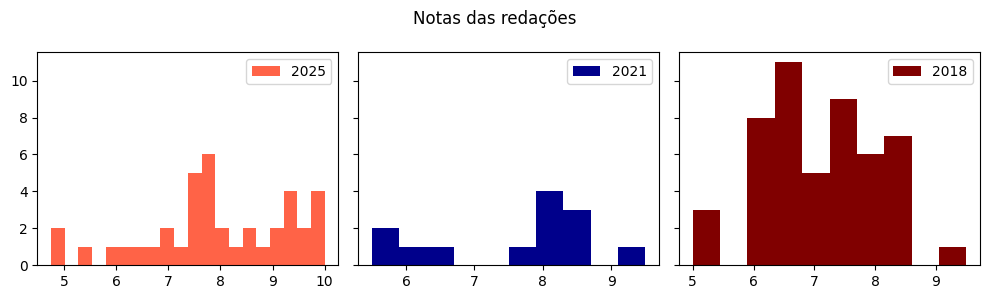

In [138]:
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
fig.suptitle("Notas das redações")
fig.set_figwidth(10)
fig.set_figheight(3)

axs[0].hist(s2025, color='tomato', label='2025',bins=20)
axs[0].legend()
axs[1].hist(s2021, color='darkblue', label='2021')
axs[1].legend()
axs[2].hist(s2018, color='maroon', label='2018')
axs[2].legend()

In [139]:
shapiro_test = {'2025':stats.shapiro(s2025),
                '2021':stats.shapiro(s2021),
                '2018':stats.shapiro(s2018)}
shapiro_test

{'2025': ShapiroResult(statistic=np.float64(0.9535703599073246), pvalue=np.float64(0.10842810060076169)),
 '2021': ShapiroResult(statistic=np.float64(0.9009170415530212), pvalue=np.float64(0.13766041907789445)),
 '2018': ShapiroResult(statistic=np.float64(0.9680686442056596), pvalue=np.float64(0.19293265161318335))}

In [140]:
stats.f_oneway(s2025,s2021,s2018)

F_onewayResult(statistic=np.float64(6.080840855669573), pvalue=np.float64(0.0032297154976540315))

In [135]:
print(stats.tukey_hsd(s2025,s2021,s2018))

Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.372     0.581    -0.516     1.260
 (0 - 2)      0.864     0.002     0.272     1.457
 (1 - 0)     -0.372     0.581    -1.260     0.516
 (1 - 2)      0.493     0.367    -0.371     1.356
 (2 - 0)     -0.864     0.002    -1.457    -0.272
 (2 - 1)     -0.493     0.367    -1.356     0.371



4. Resultados

Utilizei o teste de Shapiro para verificar se os dados possuem distribuição normal e, nos 3 casos, a H0 foi aceita, ou seja, todos seguem uma distribuição normal. Em seguida, fiz o teste ANOVA para comprovar se existe alguma diferença significativa entre as amostras, nesse caso a H0 foi rejeitada já que o p-valor é menor do que 0.05, indicando que existe diferença significativa em pelo menos 2 grupos.
Por fim, apliquei o teste de tukey para identificar qual era o conjunto que apresentava maior diferença estatística e o conjunto 0, 2025, se destacou pois o p-valor foi bem proximo de 0 na comparação entre pares com o grupo 2.